In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

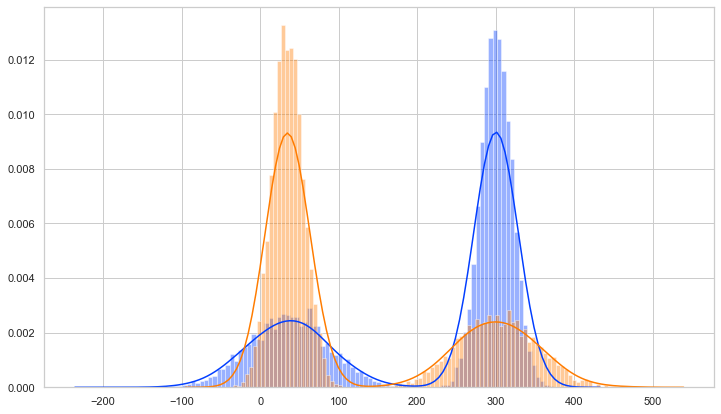

In [2]:
value1 = np.random.normal(loc=35,scale=50,size=5000)
value2 =  np.random.normal(loc=300,scale=20,size=10000)
q1 = np.concatenate((value1,value2))
value1 = np.random.normal(loc=300,scale=50,size=5000)
value2 =  np.random.normal(loc=35,scale=20,size=10000)
q2 = np.concatenate((value1,value2))
fig = plt.subplots(1,1,figsize = (12,7))
sns.distplot(q1,bins=100)
sns.distplot(q2,bins=100)

[(0.6665339228305939, 300.5196942480759), (0.33346607716940596, 37.86507683333804)]
[(0.6666211901430378, 0.5824702063424064), (0.3333788098569612, 298.1281426170022)]
[299.9372240417335, 260.26306578366416]
[8.726731244390606e-05, 8.726731244473873e-05]
[(0.6665339228305939, 300.5196942480759), (0.33346607716940596, 37.86507683333804)]
[(0.6666642654020054, 20.27874499768412), (0.33333573459799487, 299.69722944760633)]
[280.2409492503918, 261.8321526142683]
[0.0001303425714115347, 0.00013034257141109062]
[(0.6665339228305939, 300.5196942480759), (0.33346607716940596, 37.86507683333804)]
[(0.6665034847099173, 40.32059030831465), (0.33349651529008273, 303.41586640538395)]
[260.19910393976124, 265.5507895720459]
[3.0438120676601343e-05, 3.0438120676767877e-05]
[(0.6665339228305939, 300.5196942480759), (0.33346607716940596, 37.86507683333804)]
[(0.6676967062096496, 60.47459451805321), (0.33230329379035, 301.0892877914203)]
[240.04509973002268, 263.22421095808227]
[0.0011627833790557318, 0

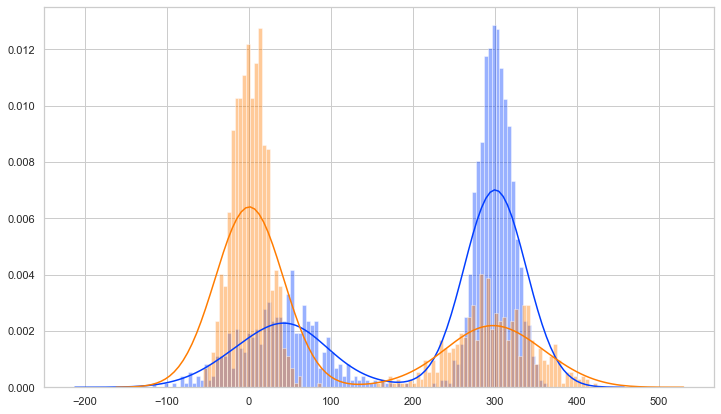

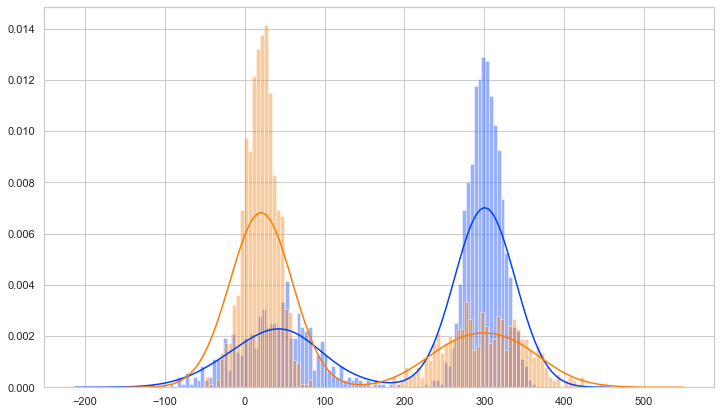

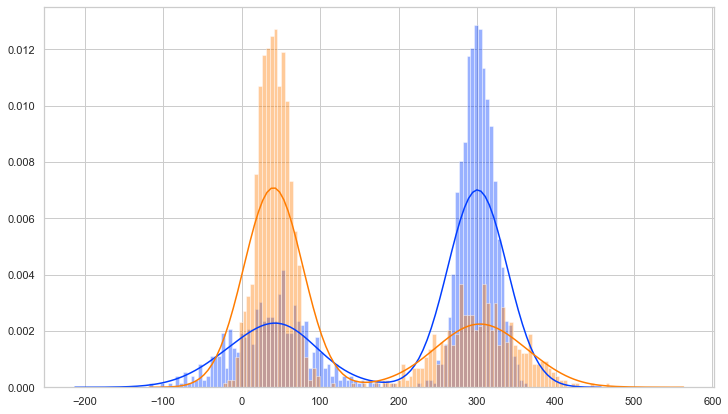

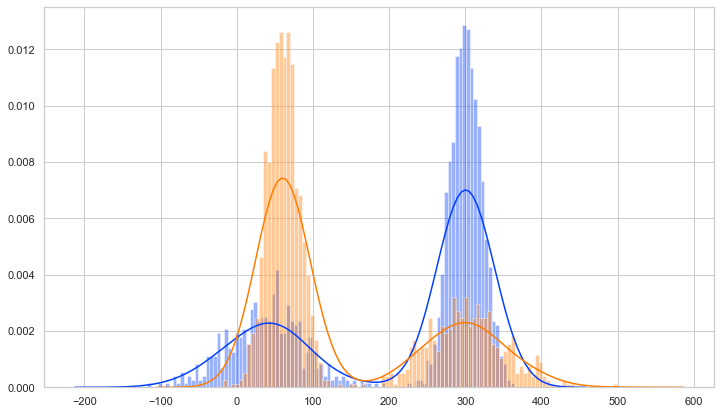

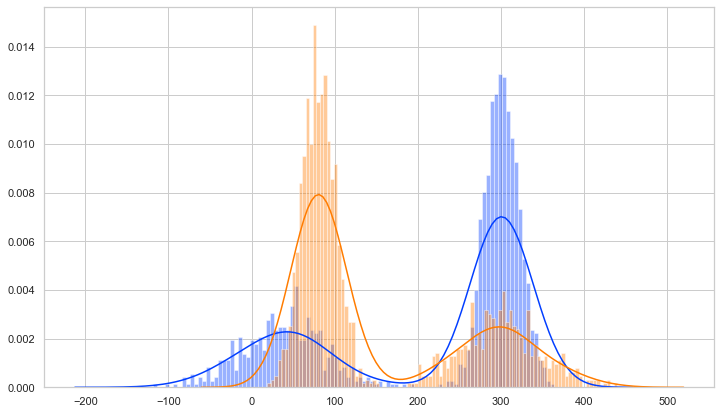

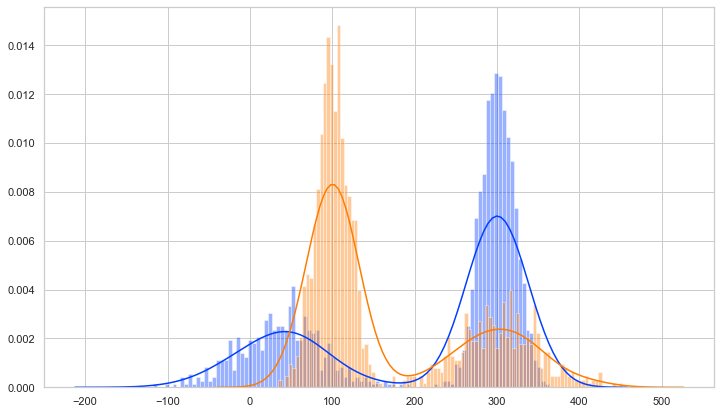

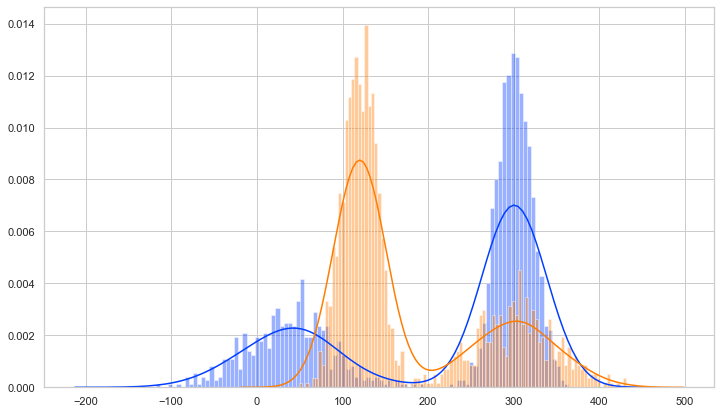

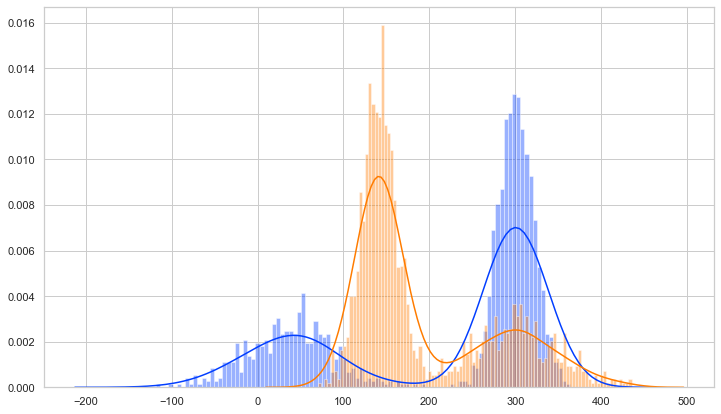

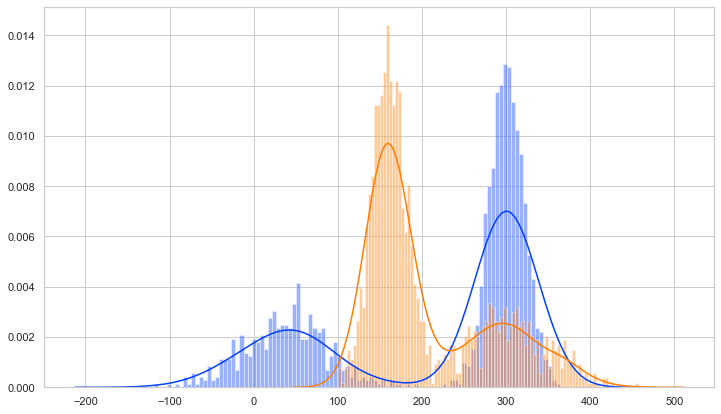

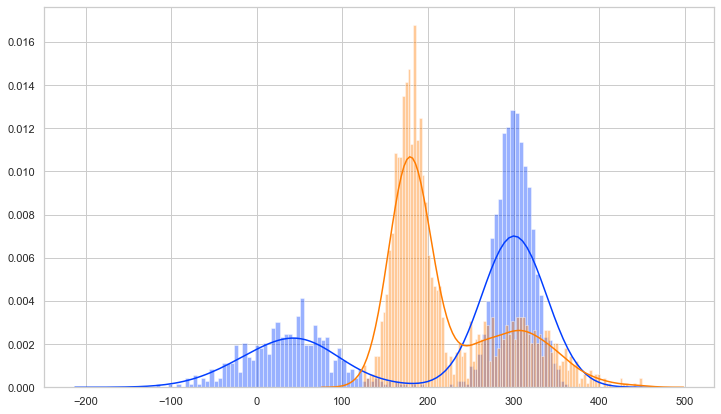

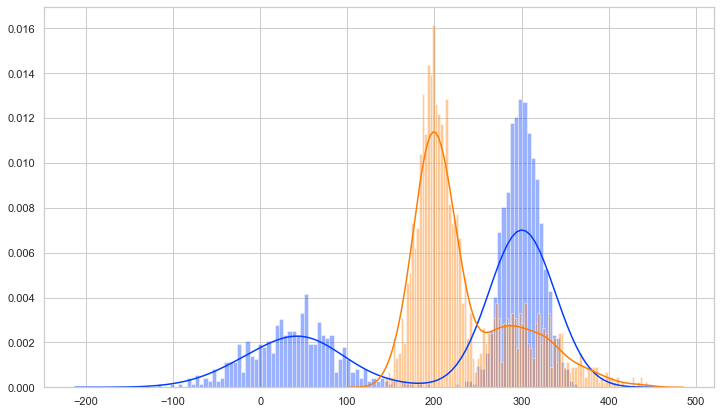

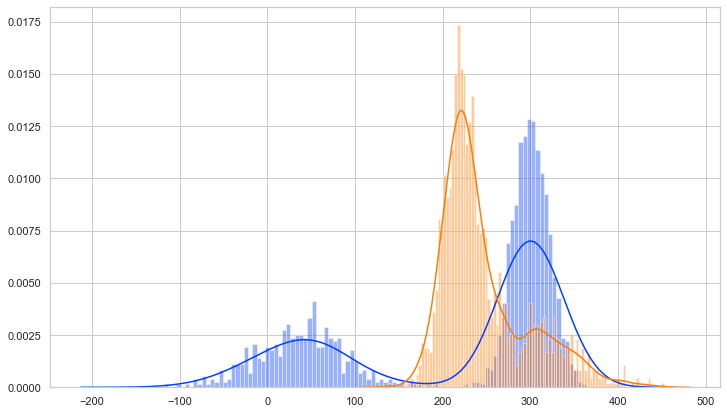

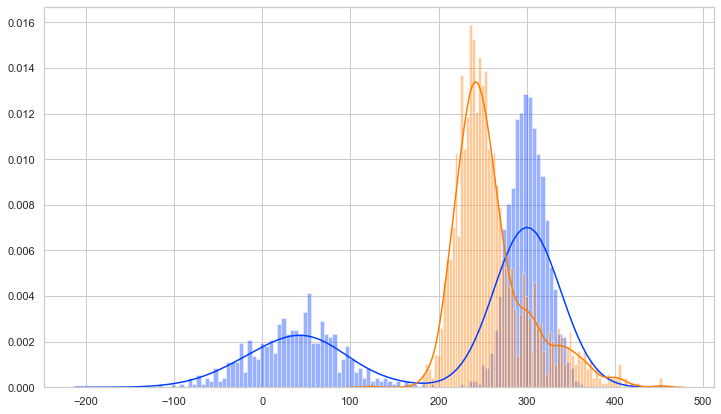

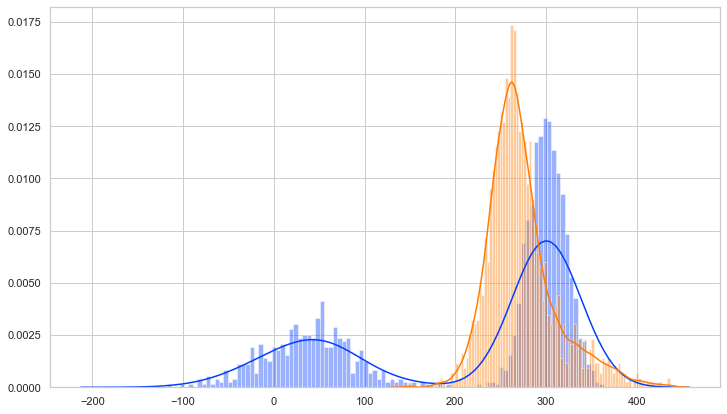

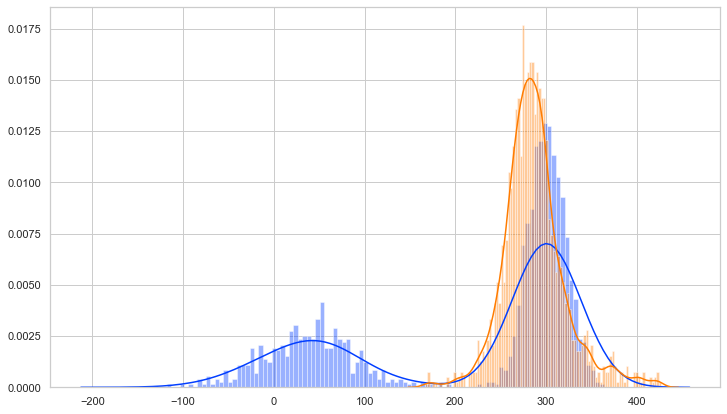

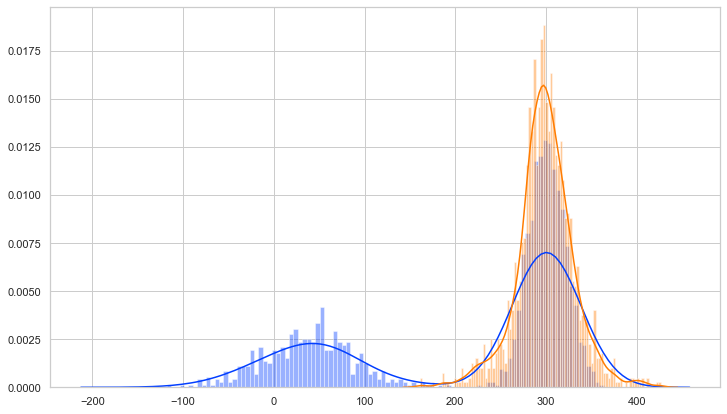

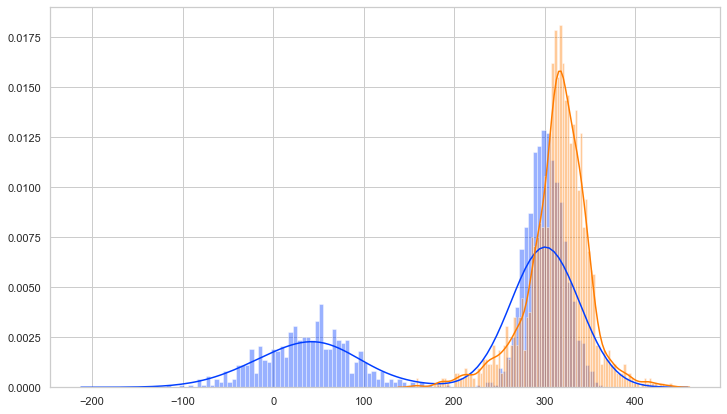

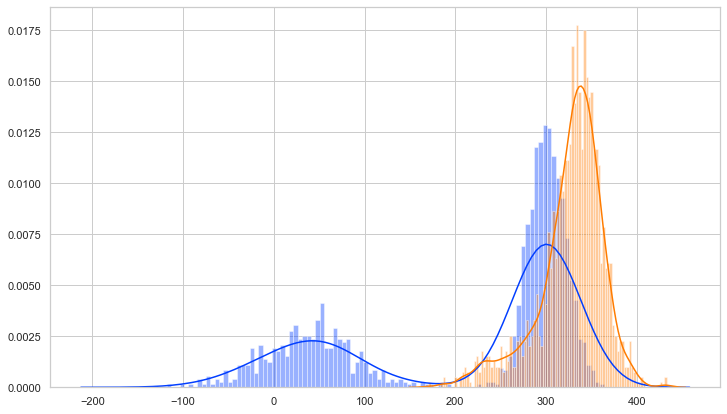

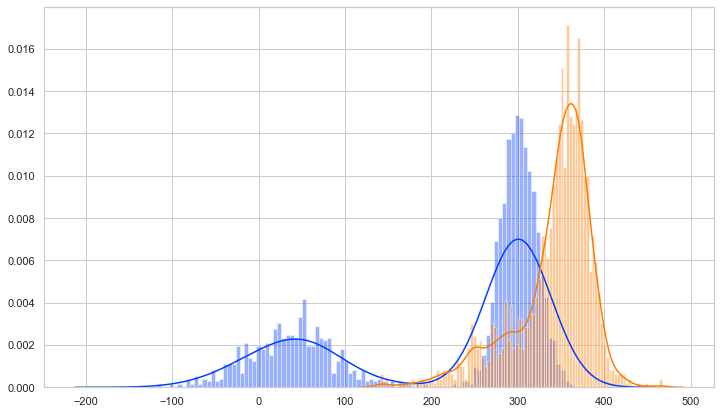

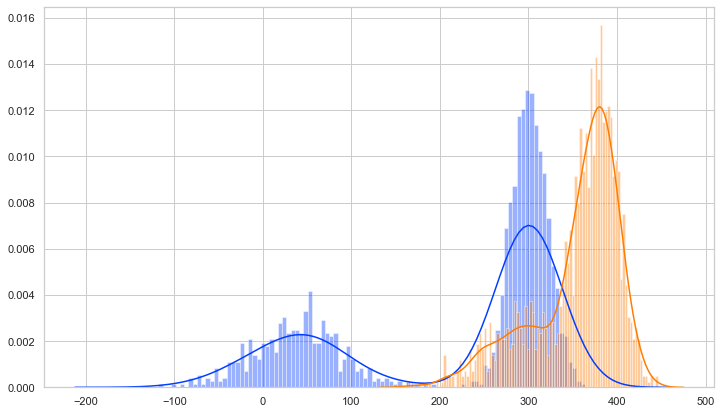

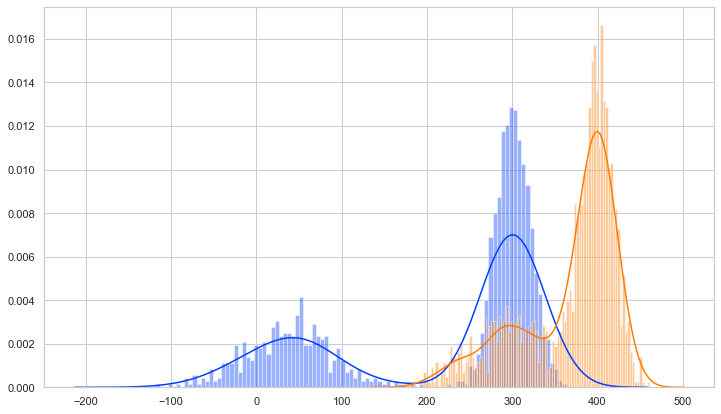

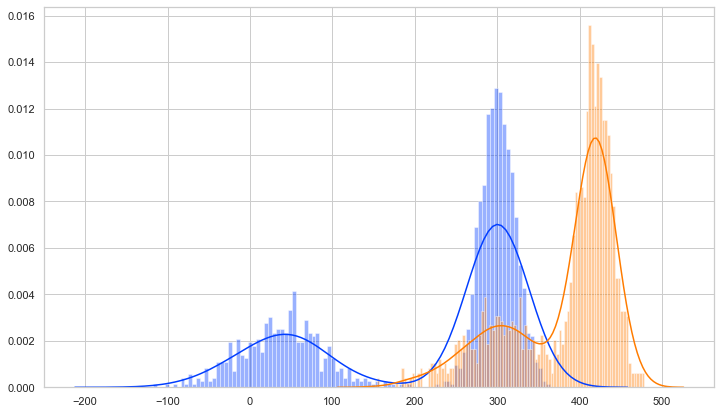

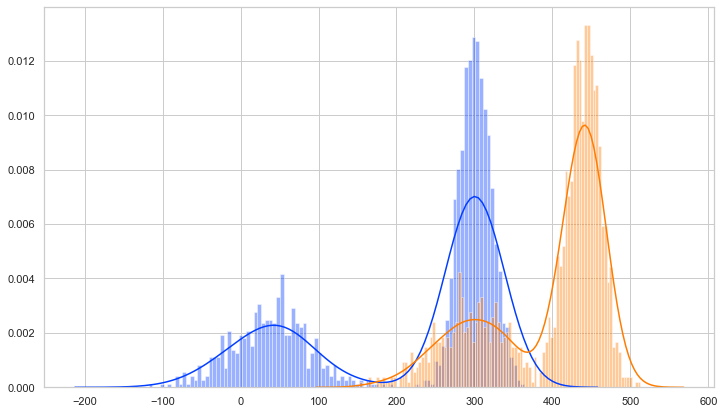

In [4]:
i=30
mymeans=[]
ilist=[]
newmet=[]
value1 = np.random.normal(loc=35,scale=50,size=500)
value2 =  np.random.normal(loc=300,scale=20,size=1000)
q1 = np.concatenate((value1,value2))
for f in range(0,450,20):
    value1 = np.random.normal(loc=300,scale=50,size=500)
    value2 =  np.random.normal(loc=f,scale=20,size=1000)
    q2 = np.concatenate((value1,value2))
    fig = plt.subplots(1,1,figsize = (12,7))
    sns.distplot(q1,bins=100)
    sns.distplot(q2,bins=100)
    #plt.show()
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=2,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:

        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=2,
                                          covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm
  
    means=[]
    for i in range(len(best_gmmq1.means_)):
        means.append(best_gmmq1.means_[i][0])
    x = dict(zip(best_gmmq1.weights_,means))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    print(od1)
    means=[]
    for i in range(len(best_gmmq2.means_)):
        means.append(best_gmmq2.means_[i][0])
    y = dict(zip(best_gmmq2.weights_,means))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    print(od2)
    thres = 0.05
    diffmean = []
    diffweights = []
    for i in range(len(od1)):
        diffmean.append(abs(od1[i][1] - od2[i][1]))
        diffweights.append(abs(od1[i][0] - od2[i][0]))
    print(diffmean)
    print(diffweights)
    diffmean = np.array(diffmean)
    diffweights = np.array(diffweights) 
    g=np.sum(diffmean * diffweights)
    newmet.append(g)
    mymeans.append(diffmean[0])
    ilist.append(f)

In [5]:
diffmean = np.array(diffmean)
diffweights = np.array(diffweights) 

In [6]:
x=diffmean * diffweights
np.sum(x)

2.7946453958687716

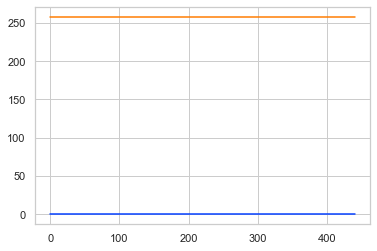

In [7]:
sns.lineplot(ilist,diffweights[1])
sns.lineplot(ilist,diffmean[1])

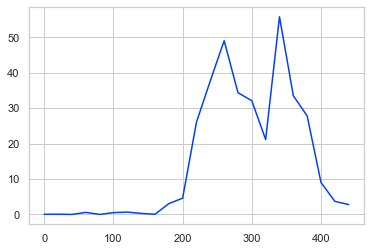

In [8]:
plt.plot(ilist,newmet)

In [10]:
diffmean
diffweights

array([0.00701955, 0.00701955])

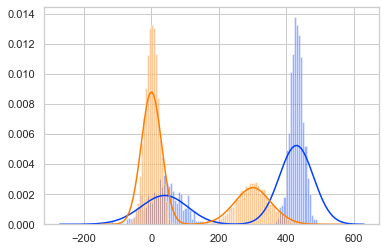

[(0.6666666647677306, 429.6519888891154), (0.3333333352322701, 35.14622534553599)]
[(0.6666653297607672, -0.2156461103581956), (0.33333467023923125, 300.7130464657839)]
[429.8676349994736, 265.56682112024794]
[1.335006963421037e-06, 1.3350069611450799e-06]


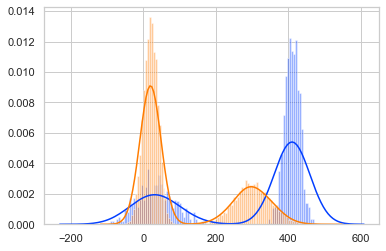

[(0.666666666226804, 410.1508640598919), (0.3333333337731961, 34.087185691226395)]
[(0.6667092667985768, 19.848411192743463), (0.333290733201423, 301.1175941234541)]
[390.3024528671484, 267.0304084322277]
[4.260057177274401e-05, 4.260057177313259e-05]


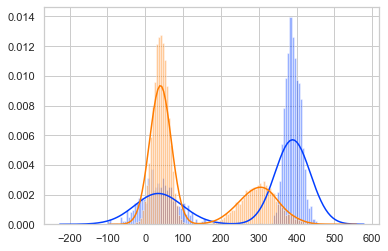

[(0.6666665828876006, 389.6487753077875), (0.3333334171123992, 35.569506779343094)]
[(0.6666416558869699, 39.96821844366631), (0.333358344113033, 300.03991795097886)]
[349.6805568641212, 264.47041117163576]
[2.4927000630725615e-05, 2.492700063377873e-05]


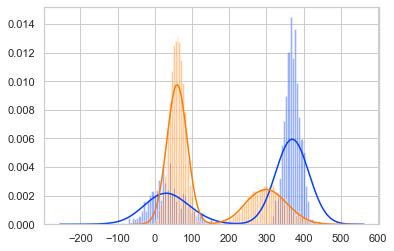

[(0.6666666657289797, 369.55991201661055), (0.3333333342710196, 34.13425131439099)]
[(0.666555996309229, 59.931782733409314), (0.33344400369076915, 300.6740183038097)]
[309.62812928320125, 266.5397669894187]
[0.00011066941975068634, 0.00011066941974957611]


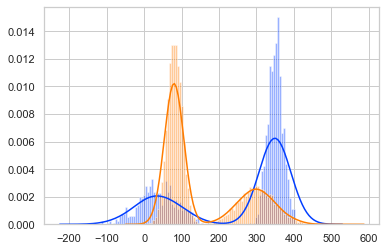

[(0.6666660744848403, 349.53258153193684), (0.33333392551515933, 36.38117232771331)]
[(0.6665592848970417, 79.99970710966899), (0.3334407151029578, 299.774921218819)]
[269.53287442226787, 263.39374889110564]
[0.0001067895877985281, 0.00010678958779847258]


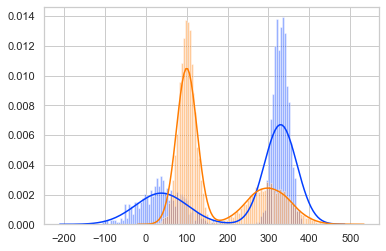

[(0.6666651926214149, 329.81570032545176), (0.3333348073785845, 37.62373689047106)]
[(0.6662702353924937, 100.14319713145034), (0.3337297646075065, 300.2469900228388)]
[229.67250319400142, 262.6232531323678]
[0.0003949572289211334, 0.00039495722892196605]


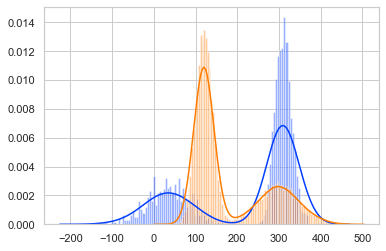

[(0.6666647289202831, 309.9141223281887), (0.333335271079716, 33.339706685878745)]
[(0.6664212601986335, 120.16785385579944), (0.3335787398013706, 299.5738256391463)]
[189.74626847238926, 266.23411895326757]
[0.00024346872164959787, 0.00024346872165459388]


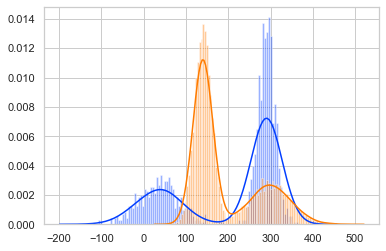

[(0.6666462681567465, 290.39819484718856), (0.33335373184325306, 35.693444621397106)]
[(0.6679814091316446, 140.00359966585256), (0.33201859086835933, 299.6942701750084)]
[150.394595181336, 264.0008255536113]
[0.0013351409748980636, 0.0013351409748937337]


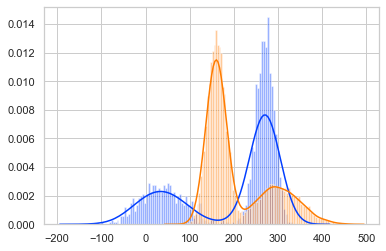

[(0.6667883550865308, 269.6356323684125), (0.33321164491346955, 36.3985842843978)]
[(0.6714586043369692, 160.00728982011256), (0.32854139566303076, 301.3955330452441)]
[109.62834254829991, 264.9969487608463]
[0.004670249250438463, 0.004670249250438796]


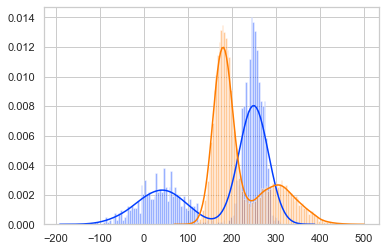

[(0.6656967175162417, 249.0611878234316), (0.3343032824837591, 36.858146240084984)]
[(0.6787586023823146, 180.33291280485295), (0.3212413976176864, 303.5753298827002)]
[68.72827501857864, 266.7171836426152]
[0.013061884866072848, 0.013061884866072737]


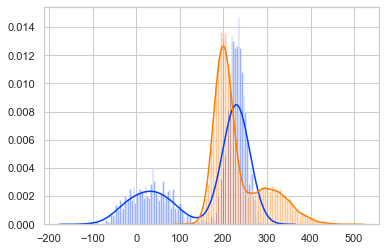

[(0.6677717889360392, 229.43549656954403), (0.33222821106396117, 31.521416602256036)]
[(0.6934789441192061, 200.50216614684356), (0.30652105588079526, 307.30861435999606)]
[28.933330422700465, 275.78719775774005]
[0.025707155183166908, 0.02570715518316591]


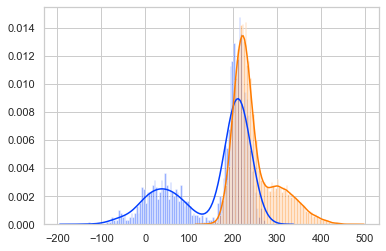

[(0.6681357159021126, 211.13154670416148), (0.33186428409788765, 37.64504606792376)]
[(0.7310128256618303, 221.6505814116669), (0.2689871743381721, 314.7250643418383)]
[10.519034707505426, 277.0800182739145]
[0.06287710975971772, 0.06287710975971555]


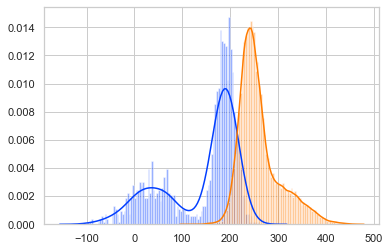

[(0.6720666619653904, 189.44185380964706), (0.32793333803461006, 35.10946835013138)]
[(0.7806454568646243, 241.8070181317333), (0.21935454313537767, 324.9195657113529)]
[52.36516432208623, 289.81009736122155]
[0.10857879489923383, 0.10857879489923239]


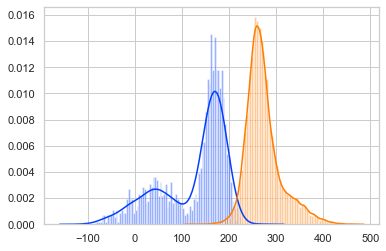

[(0.6671623283237291, 169.943488816369), (0.3328376716762715, 37.08907535477251)]
[(0.8121695203705227, 260.3469211670285), (0.18783047962947516, 328.4365720680123)]
[90.40343235065947, 291.3474967132398]
[0.14500719204679358, 0.14500719204679632]


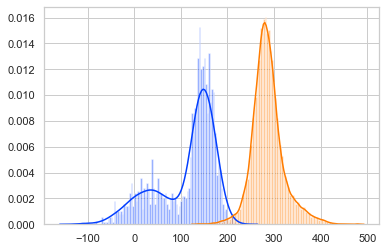

[(0.6834304211076404, 149.70429363775483), (0.3165695788923598, 30.499816410661342)]
[(0.7302097188711478, 280.37667224779295), (0.2697902811288533, 303.05930361151275)]
[130.67237861003812, 272.5594872008514]
[0.04677929776350742, 0.04677929776350653]


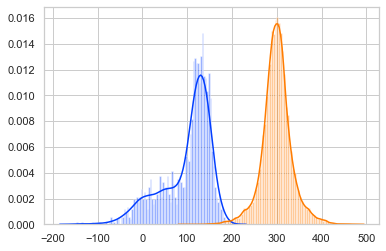

[(0.6812267428427868, 129.7998598094919), (0.31877325715721316, 33.7593627342505)]
[(0.5883536968052719, 299.0934535835691), (0.41164630319472756, 301.4334789590332)]
[169.2935937740772, 267.6741162247827]
[0.0928730460375149, 0.0928730460375144]


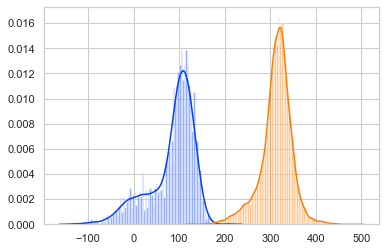

[(0.7504794184692564, 108.12255140966658), (0.24952058153074336, 13.02244054680533)]
[(0.7496674079644567, 319.9222848916141), (0.2503325920355416, 292.5310220043478)]
[211.7997334819475, 279.50858145754245]
[0.0008120105047996207, 0.0008120105047982329]


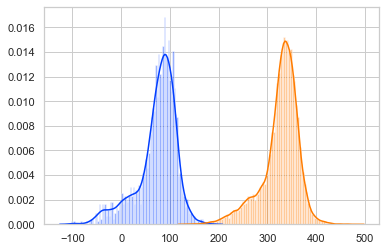

[(0.8161596216715763, 88.55946598968706), (0.18384037832842348, 8.130461787263517)]
[(0.8204252519995406, 339.37358428622923), (0.17957474800046164, 269.10736855359886)]
[250.81411829654218, 260.97690676633533]
[0.004265630327964343, 0.004265630327961845]


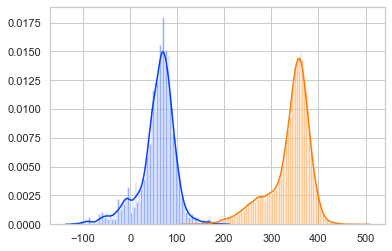

[(0.8423833810375321, 69.38049060596214), (0.15761661896246984, -3.8087685658559254)]
[(0.7852635135209227, 357.84378748267596), (0.21473648647907553, 273.5202643751829)]
[288.4632968767138, 277.3290329410388]
[0.05711986751660936, 0.057119867516605694]


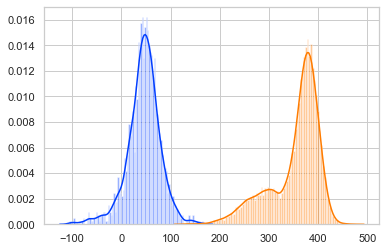

[(0.7234439144963369, 50.00014434541739), (0.2765560855036639, 33.8449972448016)]
[(0.7339414432151941, 378.4312841970333), (0.26605855678480717, 283.88344743212144)]
[328.4311398516159, 250.03845018731985]
[0.010497528718857119, 0.01049752871885673]


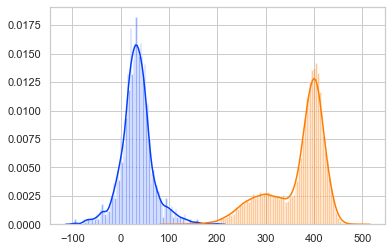

[(0.6453239589047843, 31.32156743073067), (0.35467604109521705, 36.94808093002111)]
[(0.6909525510904048, 399.32949533491427), (0.30904744890959396, 293.6040656208385)]
[368.0079279041836, 256.65598469081743]
[0.04562859218562043, 0.045628592185623096]


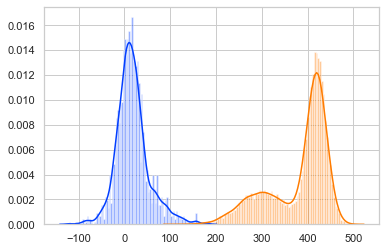

[(0.7379712752909695, 10.109938995842398), (0.26202872470903077, 38.774583230351666)]
[(0.6794459981691665, 419.480691716581), (0.3205540018308329, 297.51204400552234)]
[409.3707527207386, 258.7374607751707]
[0.058525277121803, 0.05852527712180211]


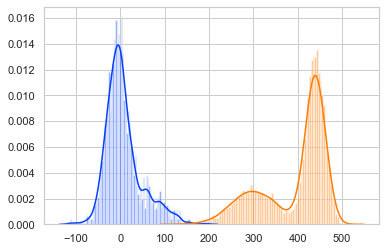

[(0.8139049588770209, -8.177267117921307), (0.18609504112297984, 70.67553042447956)]
[(0.6685278577304408, 439.8174872330218), (0.33147214226956034, 299.8403581459734)]
[447.9947543509431, 229.16482772149385]
[0.1453771011465801, 0.1453771011465805]


In [11]:
mkc = 450
mymeans=[]
newmet=[]
ilist=[]
ilist1=[]
value1 = np.random.normal(loc=35,scale=50,size=500)
value2 =  np.random.normal(loc=300,scale=20,size=1000)
q1 = np.concatenate((value1,value2))
for f in range(0,450,20):
    mkc = mkc - 20
    value1 = np.random.normal(loc=35,scale=50,size=500)
    value2 =  np.random.normal(loc=mkc,scale=20,size=1000)
    q1 = np.concatenate((value1,value2))
    value1 = np.random.normal(loc=300,scale=50,size=5000)
    value2 =  np.random.normal(loc=f,scale=20,size=10000)
    q2 = np.concatenate((value1,value2))
    fig = plt.subplots(1,1)
    sns.distplot(q1,bins=100)
    sns.distplot(q2,bins=100)
    plt.show()
    lowest_bic = np.infty
    bic = []
    
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=2,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=2,
                                          covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm
  
    means=[]
    for i in range(len(best_gmmq1.means_)):
        means.append(best_gmmq1.means_[i][0])
    x = dict(zip(best_gmmq1.weights_,means))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    print(od1)
    means=[]
    for i in range(len(best_gmmq2.means_)):
        means.append(best_gmmq2.means_[i][0])
    y = dict(zip(best_gmmq2.weights_,means))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    print(od2)
    thres = 0.05
    diffmean = []
    diffweights = []
    for i in range(min(len(od1),len(od2))):
        diffmean.append(abs(od1[i][1] - od2[i][1]))
        diffweights.append(abs(od1[i][0] - od2[i][0]))
    print(diffmean)
    print(diffweights)
    diffmean = np.array(diffmean)
    diffweights = np.array(diffweights) 
    g=np.sum(diffmean * diffweights)
    newmet.append(g)
    mymeans.append(diffmean[0])
    ilist.append(f)
    ilist1.append(mkc)

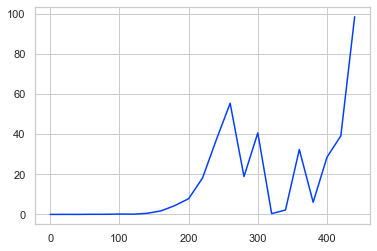

In [12]:
sns.lineplot(ilist,newmet)

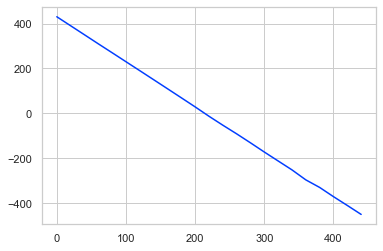

In [37]:
sns.lineplot(ilist,mymeans)

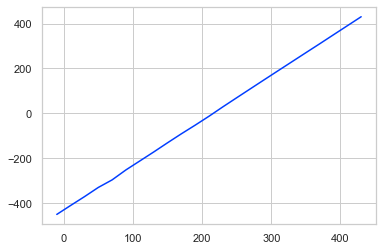

In [38]:
sns.lineplot(ilist1,mymeans)

[(0.7810961135984251, 357.9953376671169),
 (0.21890388640157418, 276.531896129616)]